## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""

model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
Epoch = 500
model.fit(x_train, y_train, 
          epochs=Epoch, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 15ms/step - loss: 2.2799 - accuracy: 0.1329 - val_loss: 2.2357 - val_accuracy: 0.1806
Epoch 2/500
196/196 [==============================] - 3s 13ms/step - loss: 2.2077 - accuracy: 0.1981 - val_loss: 2.1763 - val_accuracy: 0.2218
Epoch 3/500
196/196 [==============================] - 3s 13ms/step - loss: 2.1527 - accuracy: 0.2325 - val_loss: 2.1252 - val_accuracy: 0.2455
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 2.1052 - accuracy: 0.2564 - val_loss: 2.0814 - val_accuracy: 0.2719
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0658 - accuracy: 0.2748 - val_loss: 2.0462 - val_accuracy: 0.2845
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0334 - accuracy: 0.2882 - val_loss: 2.0159 - val_accuracy: 0.3048
Epoch 7/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0053 - accuracy: 0.3012 - val_loss: 1.9903 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.6533 - accuracy: 0.4222 - val_loss: 1.6586 - val_accuracy: 0.4199
Epoch 58/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6504 - accuracy: 0.4249 - val_loss: 1.6552 - val_accuracy: 0.4229
Epoch 59/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6474 - accuracy: 0.4255 - val_loss: 1.6519 - val_accuracy: 0.4254
Epoch 60/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6444 - accuracy: 0.4255 - val_loss: 1.6506 - val_accuracy: 0.4231
Epoch 61/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6412 - accuracy: 0.4277 - val_loss: 1.6458 - val_accuracy: 0.4274
Epoch 62/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6384 - accuracy: 0.4295 - val_loss: 1.6441 - val_accuracy: 0.4245
Epoch 63/500
196/196 [==============================] - 3s 14ms/step - loss: 1.6354 - accuracy: 0.4296 - val_loss: 1.6410 - val_accuracy: 0.428

196/196 [==============================] - 3s 14ms/step - loss: 1.5183 - accuracy: 0.4693 - val_loss: 1.5398 - val_accuracy: 0.4560
Epoch 114/500
196/196 [==============================] - 3s 15ms/step - loss: 1.5166 - accuracy: 0.4704 - val_loss: 1.5385 - val_accuracy: 0.4599
Epoch 115/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5146 - accuracy: 0.4716 - val_loss: 1.5360 - val_accuracy: 0.4614
Epoch 116/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5129 - accuracy: 0.4722 - val_loss: 1.5381 - val_accuracy: 0.4589
Epoch 117/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5106 - accuracy: 0.4718 - val_loss: 1.5360 - val_accuracy: 0.4579
Epoch 118/500
196/196 [==============================] - 3s 14ms/step - loss: 1.5090 - accuracy: 0.4733 - val_loss: 1.5315 - val_accuracy: 0.4614
Epoch 119/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5073 - accuracy: 0.4737 - val_loss: 1.5354 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 1.4250 - accuracy: 0.5029 - val_loss: 1.4937 - val_accuracy: 0.4732
Epoch 170/500
196/196 [==============================] - 3s 16ms/step - loss: 1.4232 - accuracy: 0.5036 - val_loss: 1.4699 - val_accuracy: 0.4817
Epoch 171/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4216 - accuracy: 0.5026 - val_loss: 1.4704 - val_accuracy: 0.4789
Epoch 172/500
196/196 [==============================] - 3s 15ms/step - loss: 1.4201 - accuracy: 0.5039 - val_loss: 1.4740 - val_accuracy: 0.4832
Epoch 173/500
196/196 [==============================] - 3s 15ms/step - loss: 1.4186 - accuracy: 0.5053 - val_loss: 1.4708 - val_accuracy: 0.4819
Epoch 174/500
196/196 [==============================] - 3s 15ms/step - loss: 1.4170 - accuracy: 0.5043 - val_loss: 1.4650 - val_accuracy: 0.4846
Epoch 175/500
196/196 [==============================] - 3s 14ms/step - loss: 1.4157 - accuracy: 0.5050 - val_loss: 1.4646 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.3458 - accuracy: 0.5301 - val_loss: 1.4334 - val_accuracy: 0.4957
Epoch 226/500
196/196 [==============================] - 3s 15ms/step - loss: 1.3451 - accuracy: 0.5304 - val_loss: 1.4225 - val_accuracy: 0.4961
Epoch 227/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3439 - accuracy: 0.5309 - val_loss: 1.4232 - val_accuracy: 0.4968
Epoch 228/500
196/196 [==============================] - 3s 14ms/step - loss: 1.3422 - accuracy: 0.5312 - val_loss: 1.4200 - val_accuracy: 0.4964
Epoch 229/500
196/196 [==============================] - 3s 15ms/step - loss: 1.3414 - accuracy: 0.5327 - val_loss: 1.4169 - val_accuracy: 0.4997
Epoch 230/500
196/196 [==============================] - 3s 15ms/step - loss: 1.3395 - accuracy: 0.5328 - val_loss: 1.4228 - val_accuracy: 0.4966
Epoch 231/500
196/196 [==============================] - 3s 15ms/step - loss: 1.3384 - accuracy: 0.5325 - val_loss: 1.4183 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.2753 - accuracy: 0.5545 - val_loss: 1.3906 - val_accuracy: 0.5084
Epoch 282/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2743 - accuracy: 0.5542 - val_loss: 1.3924 - val_accuracy: 0.5048
Epoch 283/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2730 - accuracy: 0.5536 - val_loss: 1.3819 - val_accuracy: 0.5139
Epoch 284/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2725 - accuracy: 0.5568 - val_loss: 1.3987 - val_accuracy: 0.5041
Epoch 285/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2715 - accuracy: 0.5558 - val_loss: 1.3860 - val_accuracy: 0.5100
Epoch 286/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2699 - accuracy: 0.5566 - val_loss: 1.3861 - val_accuracy: 0.5152
Epoch 287/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2680 - accuracy: 0.5571 - val_loss: 1.3764 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 1.2106 - accuracy: 0.5766 - val_loss: 1.3541 - val_accuracy: 0.5221
Epoch 338/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2098 - accuracy: 0.5775 - val_loss: 1.3786 - val_accuracy: 0.5157
Epoch 339/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2090 - accuracy: 0.5772 - val_loss: 1.3712 - val_accuracy: 0.5156
Epoch 340/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2077 - accuracy: 0.5797 - val_loss: 1.3563 - val_accuracy: 0.5166
Epoch 341/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2065 - accuracy: 0.5799 - val_loss: 1.3715 - val_accuracy: 0.5190
Epoch 342/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2057 - accuracy: 0.5792 - val_loss: 1.3601 - val_accuracy: 0.5208
Epoch 343/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2042 - accuracy: 0.5799 - val_loss: 1.3565 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.1499 - accuracy: 0.5993 - val_loss: 1.3367 - val_accuracy: 0.5292
Epoch 394/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1486 - accuracy: 0.6005 - val_loss: 1.3472 - val_accuracy: 0.5274
Epoch 395/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1491 - accuracy: 0.5998 - val_loss: 1.3438 - val_accuracy: 0.5238
Epoch 396/500
196/196 [==============================] - 3s 17ms/step - loss: 1.1470 - accuracy: 0.5997 - val_loss: 1.3907 - val_accuracy: 0.5100
Epoch 397/500
196/196 [==============================] - 3s 17ms/step - loss: 1.1461 - accuracy: 0.6012 - val_loss: 1.3520 - val_accuracy: 0.5255
Epoch 398/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1452 - accuracy: 0.6007 - val_loss: 1.3797 - val_accuracy: 0.5062
Epoch 399/500
196/196 [==============================] - 3s 15ms/step - loss: 1.1446 - accuracy: 0.6001 - val_loss: 1.3565 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.0919 - accuracy: 0.6195 - val_loss: 1.3555 - val_accuracy: 0.5224
Epoch 450/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0910 - accuracy: 0.6203 - val_loss: 1.3455 - val_accuracy: 0.5302
Epoch 451/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0893 - accuracy: 0.6203 - val_loss: 1.3780 - val_accuracy: 0.5155
Epoch 452/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0891 - accuracy: 0.6221 - val_loss: 1.3407 - val_accuracy: 0.5261
Epoch 453/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0877 - accuracy: 0.6213 - val_loss: 1.3483 - val_accuracy: 0.5262
Epoch 454/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0850 - accuracy: 0.6221 - val_loss: 1.3309 - val_accuracy: 0.5276
Epoch 455/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0855 - accuracy: 0.6215 - val_loss: 1.3632 - val_accuracy:

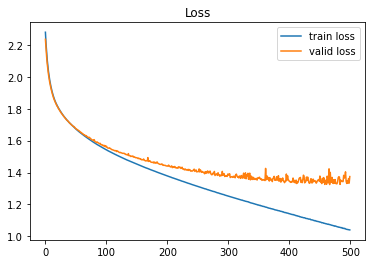

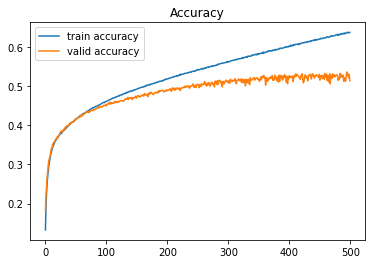

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()